# Analysis

In [14]:
import pandas as pd
import plotnine as pn


In [15]:
# Load data

# Pareto frontier
curve_fn = "/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/curve_points.csv"

# Counterpart points
counterpart_fn = "/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/counterpart_points.csv"

# Explored hypothetical systems
sampled_fn = "/Users/nathanielimel/lps/projects/rdsg/outputs/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/sampled_points.csv"

# simulation points
alphas = [0, 2, 4, 6, 8, 10]

# Learned
dynamic = "reinforcement_learning"
# dynamic = "replicator_dynamic"
# num_trials = 10
num_trials = 100

alpha_fns = {
    f"{alpha}":f"/Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/dynamics={dynamic}/num_trials={num_trials}/sim_param={alpha}/simulation_points.csv"
    for alpha in alphas
}


In [16]:
# load dataframes
curve_data = pd.read_csv(curve_fn)
counterpart_data = pd.read_csv(counterpart_fn)
sampled_data = pd.read_csv(sampled_fn)
simulation_dataframes = {
    k: pd.read_csv(alpha_fns[k]) for k in alpha_fns
}

In [17]:
# combine simulation dataframes
for key in simulation_dataframes:
    df = simulation_dataframes[key]
    df["alpha"] = key # use string for category

sim_data = pd.concat(simulation_dataframes.values())
sim_data

,rate,distortion,alpha
0,2.972324,0.997358,0
1,2.883943,1.362728,0
2,2.889300,0.246515,0
3,2.815523,6.080254,0
4,3.072201,0.957857,0
...,...,...,...
95,0.218876,10.825581,10
96,0.174656,12.132124,10
97,0.386277,9.324728,10
98,0.168030,11.774150,10


In [18]:
counterpart_data["beta"] = counterpart_data["beta"].astype(str)
counterpart_data

,rate,distortion,beta,alpha
0,3.321928,0.000000,1000.0,0.0
1,0.963131,1.822883,0.25,2.0
2,0.057531,7.616357,0.0625,4.0
3,0.004647,8.272144,0.0277777777777777,6.0
4,0.001560,8.380513,0.015625,8.0
5,0.000757,8.463557,0.01,10.0


In [19]:
# plot each language, with a unique color for each gamma

counterpart_data = counterpart_data.assign(
        alpha=pd.Categorical(
            counterpart_data["alpha"], 
            categories=[g for g in simulation_dataframes.keys()]
        )
    )

sim_data = sim_data.assign(
        alpha=pd.Categorical(
            sim_data["alpha"], 
            categories=[g for g in simulation_dataframes.keys()]
        )
    )  # preserve order in legend

sim_data["language"] = {"reinforcement_learning": "learned", "replicator_dynamic": "evolved"}[dynamic]
sampled_data["language"] = "hypothetical"
counterpart_data["language"] = "optimal counterpart"
all_data = pd.concat([counterpart_data, sim_data])


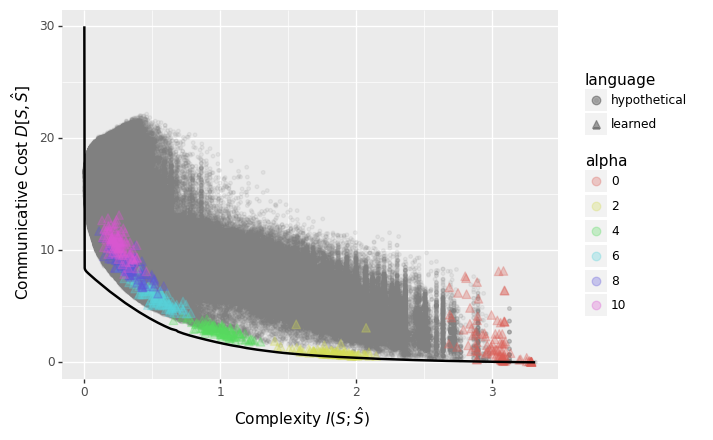

In [20]:
plot = (
    # Set data and the axes
    pn.ggplot(
        data=curve_data, mapping=pn.aes(x="rate", y="distortion")
    )  
    + pn.geom_point(  # sampled langs
        sampled_data,
        pn.aes(shape="language"),
        color="gray",
        size=1,
        alpha=0.1,
    )        
    + pn.geom_jitter( # simulation langs
        data=all_data,
        mapping=pn.aes(
            color="alpha", 
            shape="language",
            ),
        alpha=0.3,
        # shape="o",
        size=3,
        # height=0.1,
    )
    + pn.geom_point( # theoretical bound langs
        data=counterpart_data,
        mapping=pn.aes(
            color="alpha",
            shape="language",
            ),
        size=4,
    )    
    + pn.geom_line(size=1) # pareto data last    
    + pn.xlab("Complexity $I(S;\hat{S})$")
    + pn.ylab("Communicative Cost $D[S, \hat{S}]$")
)
print(plot)

In [21]:
plot_save_dir = f"/Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/dynamics={dynamic}/num_trials={num_trials}"
fn = plot_save_dir + "/multiple_alpha.png"
plot.save(filename=fn, width=10, height=10, dpi=300)

/Users/nathanielimel/miniforge3/envs/rdsg/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 10 in image.
/Users/nathanielimel/miniforge3/envs/rdsg/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /Users/nathanielimel/lps/projects/rdsg/multirun/states=10/signals=10/similarity=nosofsky/distortion=squared_dist/dynamics=reinforcement_learning/num_trials=100/multiple_alpha.png
